<a href="https://colab.research.google.com/github/flaviare1s/python-bootcamp-analise-dados-soulcode/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [1]:
import pandas as pd

#Criando DataFrames

## A partir de uma lista

In [2]:
lista = [10,20,30,40,50]
serie1 = pd.Series(lista)
display(serie1)

,0
0,10
1,20
2,30
3,40
4,50


In [3]:
serie2 = pd.Series([100,200,300], index=['a','b','c'])
print(serie2)

a    100
b    200
c    300
dtype: int64


## criando dataframe a partir de um dicionário

In [4]:
dados = {

         'Nome':['Rafael Costa','Luana Lima','Jacson','Clarice'],
        'Carros':['Biz','Creta','Brasilia','Gol'],
        'Cidades':['Rio de Janeiro','Lauro de Freitas','Manaus','Santarém'],
         'Salário':[2500,8000,8000,10000]
}

funcionarios = pd.DataFrame(dados)
display(funcionarios)

,Nome,Carros,Cidades,Salário
0,Rafael Costa,Biz,Rio de Janeiro,2500
1,Luana Lima,Creta,Lauro de Freitas,8000
2,Jacson,Brasilia,Manaus,8000
3,Clarice,Gol,Santarém,10000


#Criando arquivo CSV

In [5]:
funcionarios.to_csv('funcionarios.csv',index=False)

#Mostrar uma coluna

In [6]:
funcionarios['Salário']

,Salário
0,2500
1,8000
2,8000
3,10000


In [7]:
funcionarios[['Nome','Salário']]

,Nome,Salário
0,Rafael Costa,2500
1,Luana Lima,8000
2,Jacson,8000
3,Clarice,10000


In [8]:
funcionarios[['Nome','Salário']].head(2)

,Nome,Salário
0,Rafael Costa,2500
1,Luana Lima,8000


In [9]:
funcionarios.columns

Index(['Nome', 'Carros', 'Cidades', 'Salário'], dtype='object')

#Modificando Dataframe

In [10]:
funcionarios = funcionarios.rename(columns={
    'Nome':'Nome Completo',
    'Carros':'Carro',
    'Cidades':'Cidade',
    })

display(funcionarios)

,Nome Completo,Carro,Cidade,Salário
0,Rafael Costa,Biz,Rio de Janeiro,2500
1,Luana Lima,Creta,Lauro de Freitas,8000
2,Jacson,Brasilia,Manaus,8000
3,Clarice,Gol,Santarém,10000


#Filtrando Dados


In [11]:
chefes = funcionarios[funcionarios['Salário'] > 7500]
display(chefes)

,Nome Completo,Carro,Cidade,Salário
1,Luana Lima,Creta,Lauro de Freitas,8000
2,Jacson,Brasilia,Manaus,8000
3,Clarice,Gol,Santarém,10000


#Adicionando novos funcionários

In [12]:
novo_funcionario = ['Tathiany', 'Palio', 'Cataguases', 4500]
if novo_funcionario[0] not in funcionarios['Nome Completo'].values:
    funcionarios.loc[len(funcionarios)] = novo_funcionario

display(funcionarios)

,Nome Completo,Carro,Cidade,Salário
0,Rafael Costa,Biz,Rio de Janeiro,2500
1,Luana Lima,Creta,Lauro de Freitas,8000
2,Jacson,Brasilia,Manaus,8000
3,Clarice,Gol,Santarém,10000
4,Tathiany,Palio,Cataguases,4500


##Concat[]

In [13]:
novos_funcionarios = {
    'Nome Completo': ['Jonanthan', 'Wallace', 'Silvia'],
    'Carro': ['HB20', 'Corolla', 'Fiat Mobi'],
    'Cidade': ['Cuiabá', 'Caruari', 'DIB'],
    'Salário': [4500, 10000, 5000]
}

novos_funcionarios_df = pd.DataFrame(novos_funcionarios)

In [14]:
funcionarios = pd.concat([funcionarios, novos_funcionarios_df], ignore_index=True)
display(funcionarios)

,Nome Completo,Carro,Cidade,Salário
0,Rafael Costa,Biz,Rio de Janeiro,2500
1,Luana Lima,Creta,Lauro de Freitas,8000
2,Jacson,Brasilia,Manaus,8000
3,Clarice,Gol,Santarém,10000
4,Tathiany,Palio,Cataguases,4500
5,Jonanthan,HB20,Cuiabá,4500
6,Wallace,Corolla,Caruari,10000
7,Silvia,Fiat Mobi,DIB,5000


#Criando um Backup

In [15]:
funcionarios_bkp = funcionarios

#Removendo linhas

OBS: 'axis=0' se refere a linhas e 'axis=1' se refere a colunas

In [16]:
funcionarios = funcionarios.drop(0, axis=0)
display(funcionarios)

,Nome Completo,Carro,Cidade,Salário
1,Luana Lima,Creta,Lauro de Freitas,8000
2,Jacson,Brasilia,Manaus,8000
3,Clarice,Gol,Santarém,10000
4,Tathiany,Palio,Cataguases,4500
5,Jonanthan,HB20,Cuiabá,4500
6,Wallace,Corolla,Caruari,10000
7,Silvia,Fiat Mobi,DIB,5000


In [17]:
funcionarios = funcionarios[funcionarios['Salário'] > 5000]
display(funcionarios)

,Nome Completo,Carro,Cidade,Salário
1,Luana Lima,Creta,Lauro de Freitas,8000
2,Jacson,Brasilia,Manaus,8000
3,Clarice,Gol,Santarém,10000
6,Wallace,Corolla,Caruari,10000


#Removendo colunas

In [18]:
funcionarios = funcionarios.drop('Carro', axis=1)
display(funcionarios)

,Nome Completo,Cidade,Salário
1,Luana Lima,Lauro de Freitas,8000
2,Jacson,Manaus,8000
3,Clarice,Santarém,10000
6,Wallace,Caruari,10000


In [19]:
funcionarios = funcionarios.drop(columns='Cidade')
display(funcionarios)

,Nome Completo,Salário
1,Luana Lima,8000
2,Jacson,8000
3,Clarice,10000
6,Wallace,10000


#Resetando os índices do DataFrame original

In [20]:
funcionarios.reset_index(drop=True, inplace=True)
display(funcionarios)

,Nome Completo,Salário
0,Luana Lima,8000
1,Jacson,8000
2,Clarice,10000
3,Wallace,10000


#Modificando um dado

In [21]:
funcionarios.loc[funcionarios['Nome Completo'] == 'Jacson', 'Salário'] = 10000
display(funcionarios)

,Nome Completo,Salário
0,Luana Lima,8000
1,Jacson,10000
2,Clarice,10000
3,Wallace,10000


#Criando uma coluna a partir de outra já existente

In [22]:
funcionarios['FGTS'] = funcionarios['Salário'] * 0.08
display(funcionarios)

,Nome Completo,Salário,FGTS
0,Luana Lima,8000,640.0
1,Jacson,10000,800.0
2,Clarice,10000,800.0
3,Wallace,10000,800.0


#Criando uma nova coluna

In [23]:
funcionarios['Cargo'] = ['Gerente','Analista','Analista', 'Programador']
display(funcionarios)

,Nome Completo,Salário,FGTS,Cargo
0,Luana Lima,8000,640.0,Gerente
1,Jacson,10000,800.0,Analista
2,Clarice,10000,800.0,Analista
3,Wallace,10000,800.0,Programador


#Estatísticas descritivas

In [24]:
funcionarios.describe()

,Salário,FGTS
count,4.0,4.0
mean,9500.0,760.0
std,1000.0,80.0
min,8000.0,640.0
25%,9500.0,760.0
50%,10000.0,800.0
75%,10000.0,800.0
max,10000.0,800.0


#Informações

In [25]:
funcionarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nome Completo  4 non-null      object 
 1   Salário        4 non-null      int64  
 2   FGTS           4 non-null      float64
 3   Cargo          4 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ bytes


#Usando o backup

In [26]:
display(funcionarios_bkp)

,Nome Completo,Carro,Cidade,Salário
0,Rafael Costa,Biz,Rio de Janeiro,2500
1,Luana Lima,Creta,Lauro de Freitas,8000
2,Jacson,Brasilia,Manaus,8000
3,Clarice,Gol,Santarém,10000
4,Tathiany,Palio,Cataguases,4500
5,Jonanthan,HB20,Cuiabá,4500
6,Wallace,Corolla,Caruari,10000
7,Silvia,Fiat Mobi,DIB,5000


#Adicionando coluna de FGTS

In [27]:
funcionarios_bkp['FGTS'] = funcionarios['Salário'] * 0.08
display(funcionarios_bkp)

,Nome Completo,Carro,Cidade,Salário,FGTS
0,Rafael Costa,Biz,Rio de Janeiro,2500,640.0
1,Luana Lima,Creta,Lauro de Freitas,8000,800.0
2,Jacson,Brasilia,Manaus,8000,800.0
3,Clarice,Gol,Santarém,10000,800.0
4,Tathiany,Palio,Cataguases,4500,NaN
5,Jonanthan,HB20,Cuiabá,4500,NaN
6,Wallace,Corolla,Caruari,10000,NaN
7,Silvia,Fiat Mobi,DIB,5000,NaN


#Importando mais dados

In [28]:
mais_funcionarios = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTCnV99oBlYlgzi9mTqLv90JiRJlsy2SmZPokMYtcrseUi3X1Brt3OQxu1tJZOGRV3vt7efiuystP7J/pub?output=csv')
display(mais_funcionarios)

,Nome Completo,Carro,Cidade,Salário,FGTS
0,Ana Paula,Fusca,São Paulo,4000,320.0
1,Carlos Eduardo,Onix,Belo Horizonte,6000,480.0
2,Fernanda,Palio,Curitiba,3500,280.0
3,Ricardo,Kwid,Porto Alegre,5000,400.0
4,Juliana,Jeep Renegade,Salvador,9000,720.0
5,Marcos,Sandero,Fortaleza,5500,440.0
6,Patrícia,Argo,Recife,7500,600.0
7,Roberto,Toro,Brasília,8500,680.0
8,Camila,Compass,Goiânia,9500,760.0
9,Gustavo,Strada,Campinas,6500,520.0


#Concatenando...

In [29]:
funcionarios_bkp = pd.concat([funcionarios_bkp, mais_funcionarios], ignore_index=True)
display(funcionarios_bkp)

,Nome Completo,Carro,Cidade,Salário,FGTS
0,Rafael Costa,Biz,Rio de Janeiro,2500,640.0
1,Luana Lima,Creta,Lauro de Freitas,8000,800.0
2,Jacson,Brasilia,Manaus,8000,800.0
3,Clarice,Gol,Santarém,10000,800.0
4,Tathiany,Palio,Cataguases,4500,NaN
5,Jonanthan,HB20,Cuiabá,4500,NaN
6,Wallace,Corolla,Caruari,10000,NaN
7,Silvia,Fiat Mobi,DIB,5000,NaN
8,Ana Paula,Fusca,São Paulo,4000,320.0
9,Carlos Eduardo,Onix,Belo Horizonte,6000,480.0


#Visualizar valores únicos

In [30]:
unicos = funcionarios_bkp['Salário'].sort_values().unique()
print(unicos)

[ 2500  2900  3000  3400  3500  3800  3900  4000  4100  4500  4700  4800
  5000  5100  5200  5300  5500  5700  5900  6000  6200  6400  6500  6800
  7200  7500  7600  7800  8000  8300  8500  8700  9000  9200  9500 10000]


#nunique -> Mostrar a quantidade de valores únicos

In [31]:
funcionarios_bkp['Salário'].nunique()

36

#Descrevendo...

In [32]:
funcionarios_bkp['Salário'].describe()

,Salário
count,40.000000
mean,6087.500000
std,2107.640253
min,2500.000000
25%,4500.000000
50%,5800.000000
75%,7850.000000
max,10000.000000


# Crie uma coluna de senioridade, dependendo do valor do salário.

In [33]:
funcionarios_bkp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nome Completo  40 non-null     object 
 1   Carro          40 non-null     object 
 2   Cidade         40 non-null     object 
 3   Salário        40 non-null     int64  
 4   FGTS           36 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ KB


In [37]:
funcionarios_bkp['Salário'].astype(float)

def definir_senioridade(salario):
  if salario <= 4500:
    return 'Junior'
  elif salario > 4500 and salario <= 7750:
    return 'Pleno'
  else:
    return 'Sênior'

funcionarios_bkp['Senioridade'] = funcionarios_bkp['Salário'].apply(definir_senioridade)
display(funcionarios_bkp)

,Nome Completo,Carro,Cidade,Salário,FGTS,Senioridade
0,Rafael Costa,Biz,Rio de Janeiro,2500,640.0,Junior
1,Luana Lima,Creta,Lauro de Freitas,8000,800.0,Sênior
2,Jacson,Brasilia,Manaus,8000,800.0,Sênior
3,Clarice,Gol,Santarém,10000,800.0,Sênior
4,Tathiany,Palio,Cataguases,4500,NaN,Junior
5,Jonanthan,HB20,Cuiabá,4500,NaN,Junior
6,Wallace,Corolla,Caruari,10000,NaN,Sênior
7,Silvia,Fiat Mobi,DIB,5000,NaN,Pleno
8,Ana Paula,Fusca,São Paulo,4000,320.0,Junior
9,Carlos Eduardo,Onix,Belo Horizonte,6000,480.0,Pleno


In [35]:
print(type(funcionarios_bkp['Salário'].loc[36]))

<class 'numpy.int64'>


#Contagem de ocorrência por cidade

In [38]:
funcionarios_bkp.value_counts('Cidade')

,count
Cidade,
Belo Horizonte,3
Curitiba,3
Rio de Janeiro,3
Porto Alegre,3
São Paulo,3
Fortaleza,2
Belém,2
João Pessoa,2
Natal,2


#Média salarial por cidade

In [41]:
group_media_salario_por_cidade = funcionarios_bkp.groupby('Cidade')['Salário'].mean().sort_values(ascending=False)

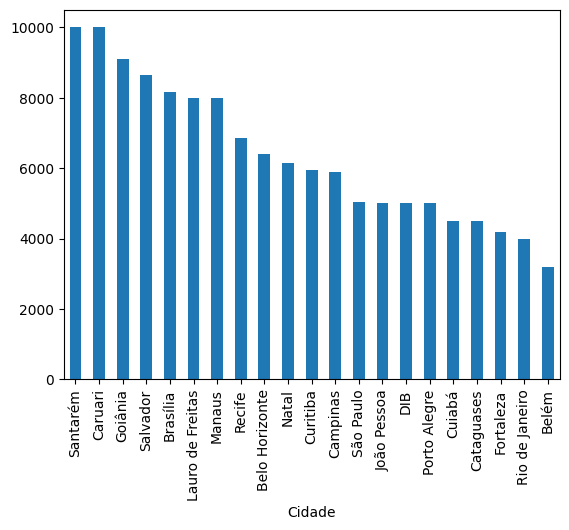

In [42]:
import matplotlib.pyplot as plt
group_media_salario_por_cidade.plot(kind='bar')
plt.show()